# Устранение пропусков в данных

Импорт библиотек и чтение данных, а также вывод колонок датасета.

In [498]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import scipy.stats as stats

hdata = pd.read_csv('Game Sales.csv', sep=",")

In [499]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('Name', dtype('O')),
 ('Year_of_Release', dtype('int64')),
 ('Genre', dtype('O')),
 ('Publisher', dtype('O')),
 ('NA_Sales', dtype('float64')),
 ('EU_Sales', dtype('float64')),
 ('JP_Sales', dtype('float64')),
 ('Other_Sales', dtype('float64')),
 ('Global_Sales', dtype('float64')),
 ('Critic_Score', dtype('int64')),
 ('Critic_Count', dtype('int64')),
 ('User_Score', dtype('float64')),
 ('User_Count', dtype('int64')),
 ('Developer', dtype('O')),
 ('Rating', dtype('O'))]

Определение колонок с пропусками в строках и их количество.

In [500]:
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Publisher', 1), ('Developer', 4), ('Rating', 68)]

Определение доли пропусков.

In [501]:
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('Publisher', 0.0001450536698578474),
 ('Developer', 0.0005802146794313896),
 ('Rating', 0.009863649550333623)]

Так как доля пропусков в каждой колонке не превышает и 1%, то разумно будет удалить строки с пропущенными значениями из датасета.

In [502]:
hdata = hdata.dropna(axis=0, how='any')
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Publisher', 0), ('Developer', 0), ('Rating', 0)]

# Кодирование категориальных признаков

Для кодирования категориальных признаков будет использован Label Encoding

In [503]:
cols_filter = ['Genre', 'Publisher', 'Developer']
data = hdata[cols_filter]
le = LabelEncoder()
cat_enc_le_1 = le.fit_transform(data['Genre'])
cat_enc_le_2 = le.fit_transform(data['Publisher'])
cat_enc_le_3 = le.fit_transform(data['Developer'])
data['Genre'] = cat_enc_le_1
data['Publisher'] = cat_enc_le_2
data['Developer'] = cat_enc_le_3
hdata[cols_filter] = data
hdata

<ipython-input-503-d6ba244fcd70>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Genre'] = cat_enc_le_1
<ipython-input-503-d6ba244fcd70>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Publisher'] = cat_enc_le_2
<ipython-input-503-d6ba244fcd70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,.hack//Infection Part 1,2002,7,22,0.49,0.38,0.26,0.13,1.27,75,35,8.5,60,271,T
1,.hack//Mutation Part 2,2002,7,22,0.23,0.18,0.20,0.06,0.68,76,24,8.9,81,271,T
2,.hack//Outbreak Part 3,2002,7,22,0.14,0.11,0.17,0.04,0.46,70,23,8.7,19,271,T
3,[Prototype],2009,0,11,0.84,0.35,0.00,0.12,1.31,78,83,7.8,356,888,M
4,[Prototype],2009,0,11,0.65,0.40,0.00,0.19,1.24,79,53,7.7,308,888,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6889,Zubo,2008,3,61,0.08,0.02,0.00,0.01,0.11,75,19,7.6,75,327,E10+
6890,Zumba Fitness,2010,10,4,1.74,0.45,0.00,0.18,2.37,42,10,5.5,16,839,E
6891,Zumba Fitness: World Party,2013,3,133,0.17,0.05,0.00,0.02,0.24,73,5,6.2,40,1271,E
6892,Zumba Fitness Core,2012,3,4,0.00,0.05,0.00,0.00,0.05,77,6,6.7,6,1271,E10+


# Нормализация числовых признаков

Посмотрим на распределение различных признаков в текущем датасете.

array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'Genre'}>,
        <AxesSubplot:title={'center':'Publisher'}>,
        <AxesSubplot:title={'center':'NA_Sales'}>],
       [<AxesSubplot:title={'center':'EU_Sales'}>,
        <AxesSubplot:title={'center':'JP_Sales'}>,
        <AxesSubplot:title={'center':'Other_Sales'}>,
        <AxesSubplot:title={'center':'Global_Sales'}>],
       [<AxesSubplot:title={'center':'Critic_Score'}>,
        <AxesSubplot:title={'center':'Critic_Count'}>,
        <AxesSubplot:title={'center':'User_Score'}>,
        <AxesSubplot:title={'center':'User_Count'}>],
       [<AxesSubplot:title={'center':'Developer'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

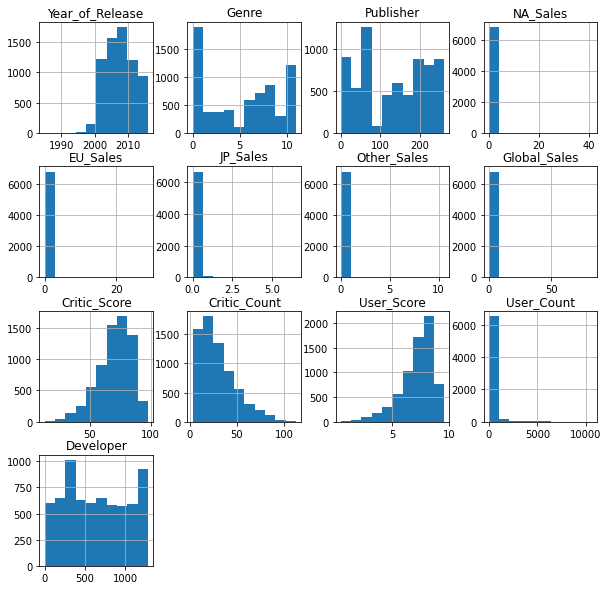

In [504]:
hdata.hist(figsize=(10,10))

Как видно практически все признаки не имеют нормального распределения. Попробуем нормализовать некоторые из них с помощью различных функций.

Логарифмическое преобразование признака Global_Sales

<AxesSubplot:>

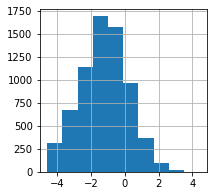

In [505]:
hdata['Global_Sales'] = np.log(hdata['Global_Sales'])
hdata['Global_Sales'].hist(figsize=(3,3))

Возведение в степень признака NA_Sales

<AxesSubplot:>

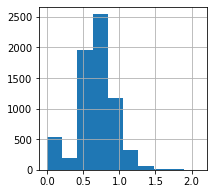

In [506]:
hdata['NA_Sales'] = hdata['NA_Sales']**0.2
hdata['NA_Sales'].hist(figsize=(3,3))

Преобразование Бокса-Кокса на признаке Critic_Score

<AxesSubplot:>

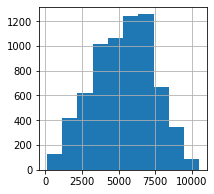

In [507]:
hdata['Critic_Score'], param = stats.boxcox(hdata['Critic_Score']) 
hdata['Critic_Score'].hist(figsize=(3,3))

Преобразование Йео-Джонсона на признаке Critic_Count

<AxesSubplot:>

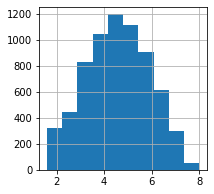

In [508]:
hdata['Critic_Count'] = hdata['Critic_Count'].astype('float')
hdata['Critic_Count'], param = stats.yeojohnson(hdata['Critic_Count'])
hdata['Critic_Count'].hist(figsize=(3,3))

Таким образом, опытным путем удалось установить способы нормализации значений для некоторых признаков.